In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import networkx as nx
import nxviz as nv
from networkx.drawing.nx_agraph import graphviz_layout

/opt/homebrew/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [13]:
import nltk
from nltk import edit_distance

In [14]:
pd.read_csv("data/swadesh_english.txt")

,1\ti
0,2\tyou
1,3\tthou
2,4\the
3,5\twe
4,6\tyou
...,...
202,204\twith
203,205\tand
204,206\tif
205,207\tbecause


In [15]:
def create_list(path):
  swadish_list = []
  encoding_list = ['windows-1252', 'utf-8']
  # en .tsv file:
  for encod in encoding_list:
    with open(path, encoding=encod) as f:
      # Read data line by line
      try:
        for line in f:
        # split data by tab 
        # store it in list
          l=line.split('\t')
          # append list to ans
          if len(l)>1:
            swadish_list.append(l[1].replace("\n",""))
          else:
            swadish_list.append(l[0].split(' ')[0].replace("\n",""))
        return swadish_list
      except UnicodeDecodeError:
        pass
  return swadish_list
 



In [16]:
english_swadish = create_list("data/swadesh_english.txt")
german_swadish = create_list("data/swadesh_german.txt")
french_swadish = create_list("data/swadesh_french.txt")
latvian_swadish = create_list("data/swadesh_latvian.txt")
len(french_swadish)

208

In [17]:
def levenshtein_score(lang1_list,lang2_list):
    score = 0
    for i in range(208):
        score += edit_distance(lang1_list[i], lang2_list[i])
    return score

In [18]:
eng_ger_score = levenshtein_score(english_swadish, german_swadish)
eng_french_score = levenshtein_score(english_swadish, french_swadish)
ger_french_score = levenshtein_score(german_swadish, french_swadish)
ger_french_score

995

In [19]:
print(eng_ger_score)
print(eng_french_score)
print(ger_french_score)

766
918
995


In [20]:
size = len(sorted(os.listdir('data')))
levenshtein_matrix = np.zeros((size,size))
languages = sorted(os.listdir('data'))
for i in range(size):
    for j in range(size):
        levenshtein_matrix[i,j] =levenshtein_score(create_list('data/'+languages[i]), create_list('data/'+languages[j]))

In [21]:
normalised_levenshtein_matrix = levenshtein_matrix/levenshtein_matrix[levenshtein_matrix!=0].min()

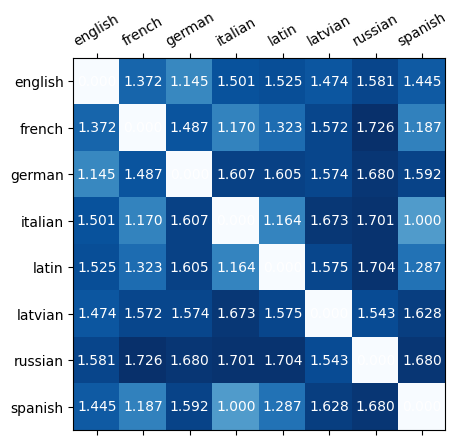

In [22]:
labels = []
for i in languages:
    labels.append(i[8:-4])
plt.matshow(normalised_levenshtein_matrix,  cmap="Blues")
plt.xticks(ticks=range(0,size),labels=labels, rotation=30)
plt.yticks(ticks=range(0,size),labels=labels)
for (i, j), z in np.ndenumerate(normalised_levenshtein_matrix):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center', color='white')


plt.savefig('swadish_levenshtein.png')
plt.show()

In [23]:
print(normalised_levenshtein_matrix)

[[0.         1.37219731 1.14499253 1.50074738 1.52466368 1.47384155
  1.58146487 1.44544096]
 [1.37219731 0.         1.48729447 1.17040359 1.32286996 1.57249626
  1.7264574  1.18684604]
 [1.14499253 1.48729447 0.         1.60687593 1.60538117 1.57399103
  1.68011958 1.59192825]
 [1.50074738 1.17040359 1.60687593 0.         1.16442451 1.67264574
  1.70104634 1.        ]
 [1.52466368 1.32286996 1.60538117 1.16442451 0.         1.5754858
  1.70403587 1.28699552]
 [1.47384155 1.57249626 1.57399103 1.67264574 1.5754858  0.
  1.5426009  1.62780269]
 [1.58146487 1.7264574  1.68011958 1.70104634 1.70403587 1.5426009
  0.         1.68011958]
 [1.44544096 1.18684604 1.59192825 1.         1.28699552 1.62780269
  1.68011958 0.        ]]


In [24]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(normalised_levenshtein_matrix)

      0   1.3722  1.14499  1.50075  1.52466  1.47384  1.58146  1.44544  
 1.3722        0  1.48729   1.1704  1.32287   1.5725  1.72646  1.18685  
1.14499  1.48729        0  1.60688  1.60538  1.57399  1.68012  1.59193  
1.50075   1.1704  1.60688        0  1.16442  1.67265  1.70105        1  
1.52466  1.32287  1.60538  1.16442        0  1.57549  1.70404    1.287  
1.47384   1.5725  1.57399  1.67265  1.57549        0   1.5426   1.6278  
1.58146  1.72646  1.68012  1.70105  1.70404   1.5426        0  1.68012  
1.44544  1.18685  1.59193        1    1.287   1.6278  1.68012        0  


In [25]:
# G = nx.Graph()
# G.add_edge(0, 1, weight=6)
# G.add_edge(1, 2, weight=6)
# G.add_edge(2, 0, weight=5)
# # G.add_edge(0, 2, weight=5)
# pos = nx.spring_layout(G, weight='weight')
# length = nx.get_node_attributes(G, 'weight')
# # G.nodes['ENG']['label'] = 'ENG'
# nx.draw(G,pos=pos, with_labels=True)

In [63]:
lex_G = nx.Graph(model='mds')
for i in range(size):
    for j in range(size):
        if i != j:
            lex_G.add_edge(labels[i], labels[j], len=normalised_levenshtein_matrix[i,j])

# pos = nx.kamada_kawai_layout(lex_G)
# pos = nx.spring_layout(lex_G, weight='weight')
# pos = nx.spring_layout(lex_G ,weight='weight')

labels

['english',
 'french',
 'german',
 'italian',
 'latin',
 'latvian',
 'russian',
 'spanish']

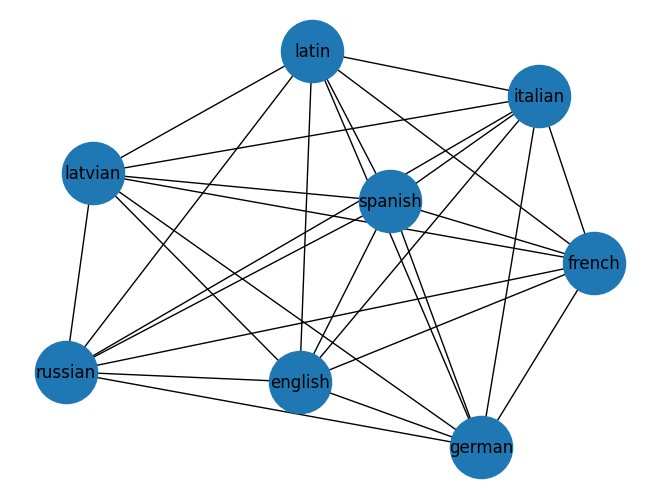

In [64]:
pos = graphviz_layout(lex_G, prog='neato')
nx.draw(lex_G,pos=pos, with_labels=True, node_size=2000)
plt.savefig('lexical_distance.png')

In [52]:
lex_G.edges(data=True)

EdgeDataView([('english', 'french', {'len': 1.3721973094170403}), ('english', 'german', {'len': 1.1449925261584455}), ('english', 'italian', {'len': 1.500747384155456}), ('english', 'latin', {'len': 1.5246636771300448}), ('english', 'latvian', {'len': 1.4738415545590433}), ('english', 'russian', {'len': 1.5814648729446936}), ('english', 'spanish', {'len': 1.445440956651719}), ('french', 'german', {'len': 1.4872944693572496}), ('french', 'italian', {'len': 1.1704035874439462}), ('french', 'latin', {'len': 1.3228699551569507}), ('french', 'latvian', {'len': 1.5724962630792227}), ('french', 'russian', {'len': 1.7264573991031391}), ('french', 'spanish', {'len': 1.186846038863976}), ('german', 'italian', {'len': 1.6068759342301944}), ('german', 'latin', {'len': 1.6053811659192825}), ('german', 'latvian', {'len': 1.5739910313901346}), ('german', 'russian', {'len': 1.6801195814648728}), ('german', 'spanish', {'len': 1.5919282511210762}), ('italian', 'latin', {'len': 1.164424514200299}), ('ita

In [29]:
[x for x,_ in sorted(zip(labels,  normalised_levenshtein_matrix[0,:]), key=lambda x:x[1])]

['english',
 'german',
 'french',
 'spanish',
 'latvian',
 'italian',
 'latin',
 'russian']